# 2023.05.10
파이토치 튜토리얼(https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html) 내용 공부 및 정리

Google Colab으로 진행


##1. Tensor
Tensor는 PyTorch에서 모델의 입력(input), 출력(output), 부호화(encode)할 때 사용되는 자료구조입니다.

In [45]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

from torchvision.transforms import ToTensor

* Datasets: save sample and label
* DataLoader:wrap an iterable around the Datasets

In [46]:
# directly create tensor
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

Tensor는 numpy의 array와 구조가 매우 유사합니다. 따라서 array를 tensor로 바꿀 수 도있고, tensor를 array로 바꿀 수도 있습니다.

In [47]:
# from numpy array to tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [48]:
# from tensor to numpy array
np_array2 = x_np.numpy()
np_array2

array([[1, 2],
       [3, 4]])

Tensor는 명시적으로 재정의(override)하지 않는다면, tensor의 속성(모양(shape), 자료 유형(dtype))을 유지합니다. 

다음의 예시는 아까 direct하게 만든 텐서를 이용하여 다른 텐서를 생성합니다.

In [51]:
# Tensor Regenerate
# ones_like(DATA) <- DATA의 구조를 그대로 따르면서 원소를 1로 채움 
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

# rand_like(DATA) <- DATA의 구조를 그대로 따르면서 원소를 random[0,1)값으로 채움
# 여기서 dtype을 float로 재정의함에 따라 x_data의 속성에 덮어씀.
x_rand = torch.rand_like(x_data, dtype = torch.float)
print(f"Rand Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Rand Tensor: 
 tensor([[0.1728, 0.1027],
        [0.0522, 0.8867]]) 



In [54]:
# 무작위 혹은 상수의 값으로 Tensor 만들기
# shape는 Tensor의 Dimension을 나타내는 tuple입니다.
# shape는 각각 차원의 수, row수, column수를 의미합니다.
shape = (3,3,2)

# rand는 random [0,1)의 값을, ones는 1, zeros는 0을 shape에 구조에 따라 생성합니다.
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"rand_tensor: \n {rand_tensor} \n")
print(f"ones_tensor: \n {ones_tensor} \n")
print(f"zeros_tensor: \n {zeros_tensor} \n")

rand_tensor: 
 tensor([[[0.1139, 0.5826],
         [0.8124, 0.3109],
         [0.3868, 0.5575]],

        [[0.6286, 0.4110],
         [0.8062, 0.7873],
         [0.7001, 0.6496]],

        [[0.5611, 0.7982],
         [0.3693, 0.2896],
         [0.7939, 0.0520]]]) 

ones_tensor: 
 tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]) 

zeros_tensor: 
 tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]]) 



In [55]:
# 다음은 tensor의 속성(Attribute)을 표현하는 방법입니다.
tensor = torch.rand(3,4)
print(f"Tensor shape: {tensor.shape}")
print(f"Tensor datatype: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Tensor shape: torch.Size([3, 4])
Tensor datatype: torch.float32
Device tensor is stored on: cpu


다음은 Tensor의 연산(Operation)에 대해서 알아봅니다.

일반적으로 GPU 환경에서 빠르게 실행됩니다.

In [56]:
# device 선택
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [60]:
tensor = torch.rand(4,4)

print(tensor)
print(f"first row: {tensor[0]}")
print(f"first column: {tensor[:,0]}")
print(f"last column: {tensor[:,-1]}") #or tensor[..., -1]

# column 값도 쉽게 바꿀 수 있습니다.
tensor[:,1] = 0
print(tensor)

tensor([[0.7659, 0.9023, 0.7363, 0.9933],
        [0.4812, 0.6392, 0.0427, 0.5420],
        [0.5645, 0.3949, 0.2102, 0.5941],
        [0.0621, 0.8549, 0.4632, 0.2220]])
first row: tensor([0.7659, 0.9023, 0.7363, 0.9933])
first column: tensor([0.7659, 0.4812, 0.5645, 0.0621])
last column: tensor([0.9933, 0.5420, 0.5941, 0.2220])
tensor([[0.7659, 0.0000, 0.7363, 0.9933],
        [0.4812, 0.0000, 0.0427, 0.5420],
        [0.5645, 0.0000, 0.2102, 0.5941],
        [0.0621, 0.0000, 0.4632, 0.2220]])


In [61]:
# tensor 합치기(pandas의 concat과 같음. 행(or 열) 이어붙이기)
t1 = torch.cat([tensor,tensor,tensor],dim = 1)
print(t1)

tensor([[0.7659, 0.0000, 0.7363, 0.9933, 0.7659, 0.0000, 0.7363, 0.9933, 0.7659,
         0.0000, 0.7363, 0.9933],
        [0.4812, 0.0000, 0.0427, 0.5420, 0.4812, 0.0000, 0.0427, 0.5420, 0.4812,
         0.0000, 0.0427, 0.5420],
        [0.5645, 0.0000, 0.2102, 0.5941, 0.5645, 0.0000, 0.2102, 0.5941, 0.5645,
         0.0000, 0.2102, 0.5941],
        [0.0621, 0.0000, 0.4632, 0.2220, 0.0621, 0.0000, 0.4632, 0.2220, 0.0621,
         0.0000, 0.4632, 0.2220]])


In [65]:
# tensor 합치기(stack 사용, Tensor에 Tensor를 원소로 붙임)
t2 = torch.stack([tensor,tensor,tensor],dim = 0)
print(t2)

tensor([[[0.7659, 0.0000, 0.7363, 0.9933],
         [0.4812, 0.0000, 0.0427, 0.5420],
         [0.5645, 0.0000, 0.2102, 0.5941],
         [0.0621, 0.0000, 0.4632, 0.2220]],

        [[0.7659, 0.0000, 0.7363, 0.9933],
         [0.4812, 0.0000, 0.0427, 0.5420],
         [0.5645, 0.0000, 0.2102, 0.5941],
         [0.0621, 0.0000, 0.4632, 0.2220]],

        [[0.7659, 0.0000, 0.7363, 0.9933],
         [0.4812, 0.0000, 0.0427, 0.5420],
         [0.5645, 0.0000, 0.2102, 0.5941],
         [0.0621, 0.0000, 0.4632, 0.2220]]])


In [67]:
# 텐서는 일반적으로 matrix를 띄우기 때문에 행렬 곱을 정의할 수 있음.
y1 = tensor@tensor.T
y2 = tensor.matmul(tensor.T)
# y1과 같은 구조를 가진 Tensor를 만들고
y3 = torch.rand_like(y1)
# out를 y3로 지정하여 값만 바꿔넣는다.
torch.matmul(tensor, tensor.T, out = y3)

# 표현 형태만 다를 뿐 같은 행렬 곱연산이다.
print(y1)
print(y2)
print(y3)

tensor([[2.1154, 0.9383, 1.1772, 0.6092],
        [0.9383, 0.5271, 0.6026, 0.1700],
        [1.1772, 0.6026, 0.7158, 0.2643],
        [0.6092, 0.1700, 0.2643, 0.2677]])
tensor([[2.1154, 0.9383, 1.1772, 0.6092],
        [0.9383, 0.5271, 0.6026, 0.1700],
        [1.1772, 0.6026, 0.7158, 0.2643],
        [0.6092, 0.1700, 0.2643, 0.2677]])
tensor([[2.1154, 0.9383, 1.1772, 0.6092],
        [0.9383, 0.5271, 0.6026, 0.1700],
        [1.1772, 0.6026, 0.7158, 0.2643],
        [0.6092, 0.1700, 0.2643, 0.2677]])


In [68]:
# element 끼리의 곱도 정의할 수 있다 (inner_product over N-Real or N-complex)
z1 = tensor*tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out = z3)

print(z1)
print(z2)
print(z3)

tensor([[0.5866, 0.0000, 0.5421, 0.9867],
        [0.2315, 0.0000, 0.0018, 0.2937],
        [0.3186, 0.0000, 0.0442, 0.3529],
        [0.0039, 0.0000, 0.2146, 0.0493]])
tensor([[0.5866, 0.0000, 0.5421, 0.9867],
        [0.2315, 0.0000, 0.0018, 0.2937],
        [0.3186, 0.0000, 0.0442, 0.3529],
        [0.0039, 0.0000, 0.2146, 0.0493]])
tensor([[0.5866, 0.0000, 0.5421, 0.9867],
        [0.2315, 0.0000, 0.0018, 0.2937],
        [0.3186, 0.0000, 0.0442, 0.3529],
        [0.0039, 0.0000, 0.2146, 0.0493]])


In [69]:
# single element tensor인 경우, item()을 이용하여 value를 추출할 수 있다.
agg = tensor.sum()
print(agg)
agg_value = agg.item()
print(agg_value, type(agg_value))

tensor(5.6774)
5.6774420738220215 <class 'float'>


In [70]:
# tensor에 add연산을하면 바꿔치기 연산(in-place)이 가능함.

ts = torch.ones(3,3)
print(f"original tensor: \n{ts} \n")
ts.add_(4)
print(f"inplace tensor: \n{ts} \n")

original tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

inplace tensor: 
tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]]) 



## 2. DATASET과 DATALOADER

In [2]:
# MNIST 데이터 내려받기
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11884163.89it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199875.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3747021.47it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16647861.98it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# batch size: 데이터로더 객체의 각 요소는 64개의 feature와 label을 가진 묶음으로 반환 즉 (64 x feature su) matrix와 (64x1) label matrix 반환
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for x, y in test_dataloader:
    print(f"Shape of X[N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape}, {y.dtype}")
    break

Shape of X[N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), torch.int64


직관적으로 N, C, H, W가 어떤 값인지 정확하게 알 수 없습니다. 따라서 간단한 예시를 통해 이해해봅니다.

In [19]:
for x,y in list(test_dataloader)[:1]:
    print(x, y)
    print(x[0])
    print(x.size(), y.size())

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

이미지 데이터의 구조는 $28*28$의 tensor로 구성되어 있고, 그 tensor가 fashionMNIST의 원소가 됩니다. 즉, 하나의 이미지를 $28*28$ tensor로 표현한다는 의미입니다. 

batch_size를 64로 두었으니, 해당 데이터는 64개의 tensor와 그 tensor의 label 데이터를 불러옵니다. 예시로 해당 이미지를 visualized 해봅니다.

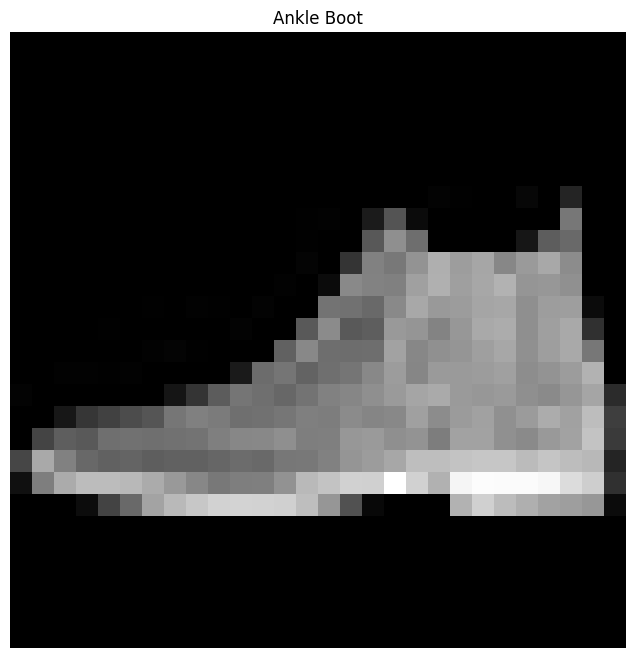

In [44]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 1, 1
for i in range(1, cols * rows + 1):
    sample_idx = 0
    img, label = list(test_dataloader)[sample_idx]
    img = img[0]
    label = label[0].item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

test_dataloader에서 첫번째 batch에 첫 원소(tensor)를 시각화하였습니다. Domain의 정보를 이용하여 Labeling을 해주고, plt의 imshow를 이용하여 tensor를 시각화합니다.

다음은 custom DataSet을 만드는 방법입니다. Dataset 클래스를 만들 때 반드시 3개의 함수를 구현해야합니다:
* \_\_init\_\_
* \_\_len\_\_
* \_\_getitem\_\_

In [73]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    # __init__ 함수는 Dataset 객체가 생성될 때 한 번만 실행됨. 여기서 이미지와 label이 포함된 디텍토리와 transform을 초기화 함.
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    # __len__ 함수는 데이터셋의 샘플 개수를 반환
    def __len__(self):
        return len(self.img_labels)
    # __getitem__ 함수는 주어진 idx로 샘플을 데이터셋에서 불러오고 반환한 후, 해당 label과 transform을 진행함.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label) 
        # sample = {"image": image, "label": label} < 해당작업을 하면 dict형태로 반환 가능
        return image, label #  sample

Dataset은 Feature와 label을 지정하는 일을 한 번에 한다. 

DataLoader는 모델을 훈련할 때, 샘플들을 minibatch로 전달하고, epoch마다 데이터를 섞어서 과적합(overfit)을 막고, multiprocessing을 사용하여 검색 속도를 높이는 작업을 추상화한 순회 가능한 객체(iterable)이다.

In [74]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size= 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size= 64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


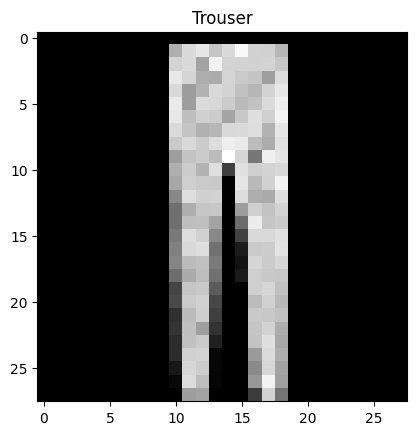

In [80]:
# iter로 반복가능한 객체에서 iterater를 반환하고 next를 통해 값을 차례대로 꺼낸다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.title(labels_map[label.item()])
plt.show()

## 3. TRANSFORM
학습에 필요한 데이터를 조작하여 학습에 적합하게 만드는 작업을 transform이라 한다.

학습을 하려면 정규화(normalize)된 tensor형태의 feature와 one-hat으로 encoding된 label이 필요하다. 이러한 transform을 위해 ToTensor와 Lambda를 이용한다.

In [87]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    # ToTensor은 ndarray를 FloatTensor로 변환하고, 픽셀의 크기를 [0,1] 범위로 비례 조정(scale)
    transform = ToTensor(),
    # torch.zeros(10)으로 한 이유는 label target이 0 ~ 9이므로 타겟의 갯수를 의미한다. 
    # value 1은 해당 one-hat encode된 tensor에 정답에 해당하는 위치에 value 1을 할당함. 
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    )   

In [88]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

## 4. 신경망 모델 구성


In [90]:
# 신경망을 구성하는데 필요한 모든 구성요소를 제공하는  API
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


In [93]:
ts = torch.rand(4,1,5,5) 
flatten = nn.Flatten()

print(ts.shape)
f_ts = flatten(ts)
print(f_ts.shape)

torch.Size([4, 1, 5, 5])
torch.Size([4, 25])


In [99]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Flatten은 tensor 내 matrix의 size를 1차원으로 바꿔준다.
        # ex) tensor in (4,1,5,5) > Flatten(tensor) in (4,25)
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # Linear 함수는 in_feature의 size를 out_feature의 size로 전환한다.
            nn.Linear(28*28, 512),
            # ReLU함수는 max(0,x)를 반환하는 활성화 함수이다.
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    # nn.Module을 상속받은 모든 클래스는 foward 메소드에 입력 데이터에 대한 연산을 구현
    def forward(self, x):
        x= self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [100]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [101]:
X = torch.rand(1,28,28, device = device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)

print(f"Predicted class: {y_pred}")

Predicted class: tensor([9])


In [106]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten은 계층을 초기화하여 $28*28$의 2D이미지를 784픽셀을 갖는 연속된 배열로 변환함.

In [107]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size()) 

torch.Size([3, 784])


nn.Linear은 저장된 가중치(weight)와 편향(bias)를 사용하여 선형 변환(linear transformation)을 적용하는 모듈.

In [108]:
layer1 = nn.Linear(in_features = 28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU는 모델의 입력과 출력 사이에 복잡한 관계(mapping)을 만들어 줍니다. 비선형 활성화(activation)는 선형 변환 후 적용되어 비선형성(nonlinearlity)을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.

$$ReLU(x) = max(x,0)$$

In [109]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}\n\n")

Before ReLU: tensor([[ 0.1219,  0.2506,  0.0504, -0.1790, -0.1340, -0.2326, -0.2579,  0.3790,
          0.4477, -0.6001,  0.4369, -0.2226, -0.3978, -0.4360, -0.3871, -0.1809,
          0.0406,  0.0929, -0.1111, -0.5587],
        [ 0.2842, -0.0202, -0.2119, -0.0496, -0.2711, -0.3019, -0.3268,  0.1807,
          0.3132, -0.2900,  0.2277, -0.5709, -0.3752,  0.0013, -0.4196,  0.0128,
          0.1511,  0.3781, -0.0662, -0.1961],
        [ 0.0867,  0.0422, -0.0814, -0.2201, -0.1080,  0.0378, -0.2991,  0.0116,
          0.3939,  0.0376,  0.3201, -0.1414, -0.0162, -0.4763, -0.5261,  0.0272,
         -0.0800,  0.3478, -0.0025, -0.5243]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1219, 0.2506, 0.0504, 0.0000, 0.0000, 0.0000, 0.0000, 0.3790, 0.4477,
         0.0000, 0.4369, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0406, 0.0929,
         0.0000, 0.0000],
        [0.2842, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1807, 0.3132,
         0.0000, 0.2277, 0.0000, 0.0000, 0.0013, 0.00

nn.Sequential은 순서를 갖는 모듈의 컨테이너입니다. 즉, 데이터는 정의된 순서대로 모든 모듈들을 통해 전달됩니다. sequential container를 이용하여 신경망을 빠르게 만들 수 있습니다.

In [110]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(f"After Seq_modules size: {logits.size()}")

After Seq_modules size: torch.Size([3, 10])


nn.Softmax 신경망의 마지막 선형 계층은 모듈에 전달될 logits를 반환합니다. logits는 모델의 분류(class)에 대한 예측 확률을 $[0,1]$ 범위로 비례하여 조정(scale)된다. dim 매개변수는 값의 합이 1이 되는 차원을 나타낸다

$$ Softmax(x_{i}) = \frac{exp(x_{i})}{\sum_{j} exp(x_j)} $$

In [115]:
softmax = nn.Softmax(dim = 1)
pred_prob = softmax(logits)

# 3 - minibatch의 결과 값
print(pred_prob.argmax(1))

tensor([0, 0, 0])


신경망 내부의 많은 계층들은 매개변수화(parameterize)된다. 즉, 학습 중에 최적화되는 가중치(weight)와 편향(bias)과 연관되어 진다.

In [116]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-2.9564e-02, -1.2294e-02,  2.2396e-02,  ..., -1.3959e-02,
         -1.5758e-02,  3.8164e-03],
        [-8.1995e-03, -3.2477e-02,  6.3151e-04,  ...,  2.7809e-02,
         -9.3264e-05,  2.9120e-02]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0273, -0.0333], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0263, -0.0072, -0.0183,  ...,  0.0330,  0.0058,  0.0014],
        [ 0.0056,  0.0333,  0.0339,  ...,  0.0403,  0.0139,  0.0267]],
       gra